In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from astropy.io import ascii

from pyia import GaiaData
import gala.coordinates as gc

In [2]:
plt.style.use('notebook')

In [3]:
g = GaiaData('../data/gd1-with-masks.fits')
stream = g[g.pm_mask & g.gi_cmd_mask]

In [8]:
faint_mask = stream.g0>20.5*u.mag

In [9]:
w = (202*u.arcsec).to(u.deg).value

In [27]:
-32.77*u.deg + 0.5*w*u.deg

<Quantity -32.74194444 deg>

In [21]:
1.167*u.deg + 1.5*w*u.deg

<Quantity 1.25116667 deg>

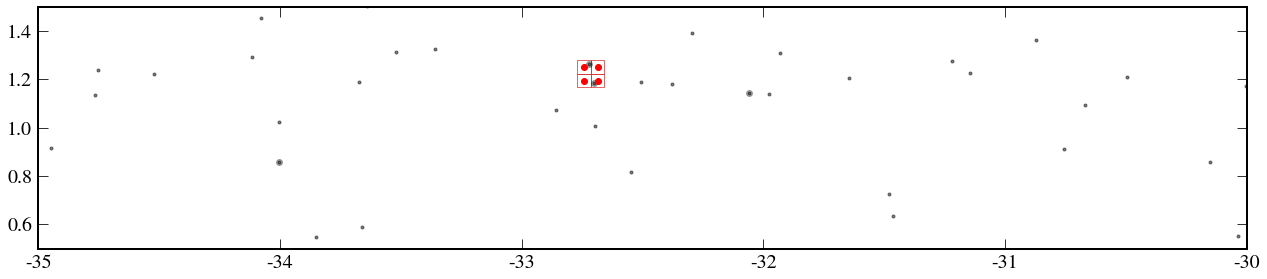

In [31]:
plt.figure(figsize=(18,6))
plt.plot(stream.phi1, stream.phi2, 'k.', alpha=0.5)
plt.plot(stream.phi1[faint_mask], stream.phi2[faint_mask], 'ko', alpha=0.3)

# r = mpl.patches.Rectangle((-32.77,1.167),2*w,2*w, fc='tab:red', ec='tab:red', alpha=0.7, zorder=1)
# plt.gca().add_patch(r)

plt.plot(x,y,'ro')

for i in range(4):
    r = mpl.patches.Rectangle((x[i].value-0.5*w,y[i].value-0.5*w),
                              w,w, fc='none', ec='tab:red', alpha=0.7, zorder=1)
    plt.gca().add_patch(r)

plt.xlim(-35,-30)
plt.ylim(0.5,1.5)
plt.gca().set_aspect('equal')
plt.tight_layout()

In [60]:
x = np.array([-32.741944, -32.741944, -32.685833, -32.685833,-31.92, -31.92,-47.065,-47.065])*u.deg
y = np.array([1.1950556, 1.2511667, 1.1950556, 1.2511667, -0.05, -0.05-w,-0.01-2*w,-0.01-w])*u.deg

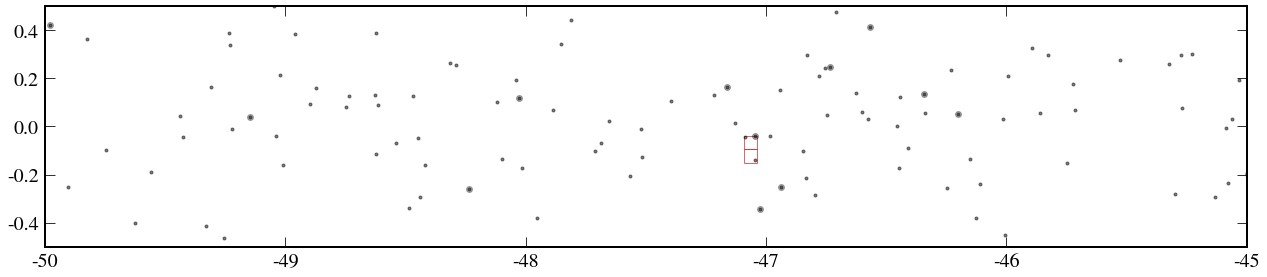

In [67]:
plt.figure(figsize=(18,6))
plt.plot(stream.phi1, stream.phi2, 'k.', alpha=0.5)
plt.plot(stream.phi1[faint_mask], stream.phi2[faint_mask], 'ko', alpha=0.3)

# plt.plot(x,y,'ro')

for i in range(6,8):
    r = mpl.patches.Rectangle((x[i].value-0.5*w,y[i].value-0.5*w),
                              w,w, fc='none', ec='tab:red', alpha=0.7, zorder=1)
    plt.gca().add_patch(r)

plt.xlim(-50,-45)
plt.ylim(-0.5,0.5)
plt.gca().set_aspect('equal')
plt.tight_layout()

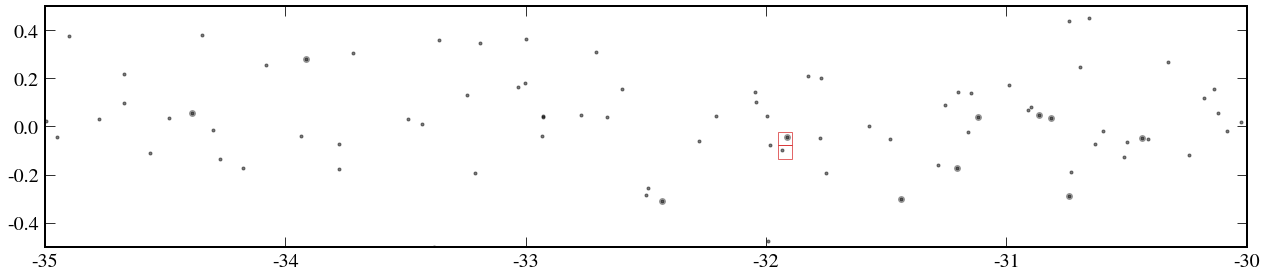

In [44]:
plt.figure(figsize=(18,6))
plt.plot(stream.phi1, stream.phi2, 'k.', alpha=0.5)
plt.plot(stream.phi1[faint_mask], stream.phi2[faint_mask], 'ko', alpha=0.3)

# plt.plot(x,y,'ro')

for i in range(4,6):
    r = mpl.patches.Rectangle((x[i].value-0.5*w,y[i].value-0.5*w),
                              w,w, fc='none', ec='tab:red', alpha=0.7, zorder=1)
    plt.gca().add_patch(r)

plt.xlim(-35,-30)
plt.ylim(-0.5,0.5)
plt.gca().set_aspect('equal')
plt.tight_layout()

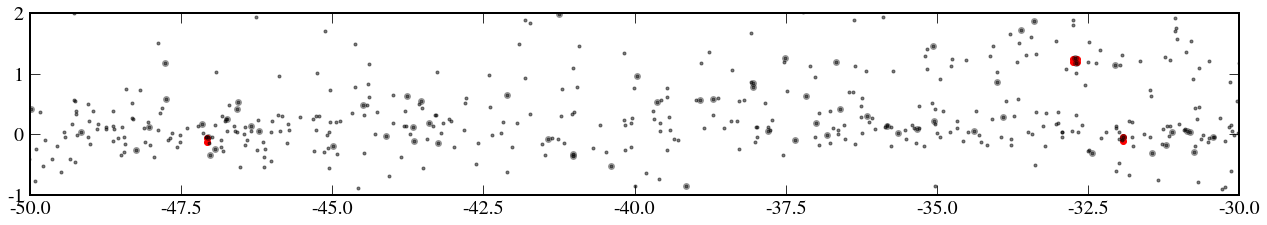

In [68]:
plt.figure(figsize=(18,6))
plt.plot(stream.phi1, stream.phi2, 'k.', alpha=0.5)
plt.plot(stream.phi1[faint_mask], stream.phi2[faint_mask], 'ko', alpha=0.3)

plt.plot(x,y,'ro', zorder=0)

plt.xlim(-35,-30)
plt.ylim(0.5,1.5)

plt.xlim(-50,-30)
plt.ylim(-1,2)

plt.gca().set_aspect('equal')
plt.tight_layout()

In [69]:
c = gc.GD1(x,y)

In [73]:
ceq = c.transform_to(coord.ICRS)

In [84]:
mag = np.ones(np.size(x))*20*u.mag

In [85]:
names = ['spur1', 'spur2', 'spur3', 'spur4', 'streame1', 'streame2', 'streamw1', 'streamw2']

In [86]:
t = Table([names, ceq.ra, ceq.dec, mag], names=('name', 'ra', 'dec', 'v'))

In [87]:
t

name,ra,dec,v
,deg,deg,mag
str8,float64,float64,float64
spur1,153.88242604960217,42.406912340170926,20.0
spur2,153.82482464399976,42.44352645522009,20.0
spur3,153.93205522102002,42.449399240345464,20.0
spur4,153.87444270976167,42.48603731431385,20.0
streame1,155.88003654187432,42.199541721530224,20.0
streame2,155.93621286443226,42.16191810999308,20.0
streamw1,144.24611156833993,30.272322996144,20.0
streamw2,144.1929617143423,30.304605023144504,20.0


In [88]:
t.write('../data/targets.csv', format='ascii.commented_header', delimiter=',', overwrite=True)